# QNN on Pynq

This notebook covers how to use low quantized neural networks on Pynq. 
It shows an example of webcam based Cifar-10 recognition using CNV network inspired at VGG-16, featuring 6 convolutional layers, 3 max pool layers and 3 fully connected layers. There are 3 different precision available:

- CNVW1A1 using 1 bit weights and 1 bit activation,
- CNVW1A2 using 1 bit weights and 2 bit activation and
- CNVW2A2 using 2 bit weights and 2 activation

All of them can be performed in pure software and hardware accelerated environment.
In order to reproduce this notebook, you will need an external USB Camera connected to the PYNQ Board.

In [1]:
import bnn

## 1. Load image from the camera

The image is captured from the external USB camera and shown:

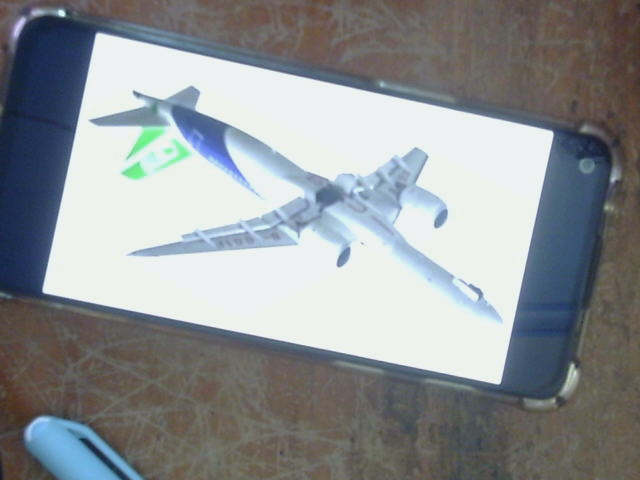

In [10]:
import cv2
from PIL import Image as PIL_Image
from PIL import ImageEnhance
from PIL import ImageOps

# says we capture an image from a webcam
cap = cv2.VideoCapture(0) 
_ , cv2_im = cap.read()
cv2_im = cv2.cvtColor(cv2_im,cv2.COLOR_BGR2RGB)
img = PIL_Image.fromarray(cv2_im)

#original captured image
#orig_img_path = '/home/xilinx/jupyter_notebooks/bnn/pictures/webcam_cifar-10.jpg'
#img = PIL_Image.open(orig_img_path)             

# The enhancement values (contrast and brightness) depend on backgroud, external lights etc
bright = ImageEnhance.Brightness(img)                                     
img = bright.enhance(0.95)  

img


## 2. Hardware Inference

The inference can be performed with different precision for weights and activation. Creating a specific Classifier will automatically download the correct bitstream onto PL and load the specified parameters.

### Case 1:

#### W1A1 - 1 bit weights and 1 activation

In [11]:
hw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW1A1,"cifar10",bnn.RUNTIME_HW)
class_ranksW1A1=hw_classifier.classify_image_details(img)
inferred_class=class_ranksW1A1.argmax()
print("Inferred class: {0}".format(inferred_class))
print("Class name: {0}".format(hw_classifier.class_name(inferred_class)))

Inference took 1583.00 microseconds
Classification rate: 631.71 images per second
Inferred class: 9
Class name: Truck


### Case 2:

#### W1A2 - 1 bit weight and 2 activation

In [4]:
hw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW1A2,"cifar10",bnn.RUNTIME_HW)
class_ranksW1A2=hw_classifier.classify_image_details(img)
inferred_class=class_ranksW1A2.argmax()
print("Inferred class: {0}".format(inferred_class))
print("Class name: {0}".format(hw_classifier.class_name(inferred_class)))

Inference took 542.00 microseconds
Classification rate: 1845.02 images per second
Inferred class: 4
Class name: Deer


### Case 3:

#### W2A2 - 2 bit weights and 2 activation

In [5]:
hw_classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW2A2,"cifar10",bnn.RUNTIME_HW)
class_ranksW2A2=hw_classifier.classify_image_details(img)
inferred_class=class_ranksW2A2.argmax()
print("Inferred class: {0}".format(inferred_class))
print("Class name: {0}".format(hw_classifier.class_name(inferred_class)))

Inference took 1622.00 microseconds
Classification rate: 616.52 images per second
Inferred class: 4
Class name: Deer


## 3. Summary

### Rankings

The rankings can be visualized using `matplotlib`:

#### W1A1:

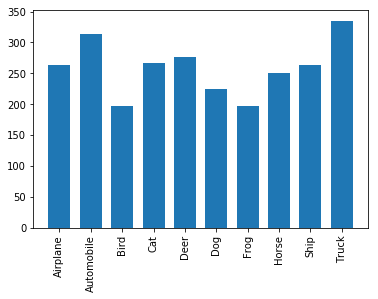

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x_pos = np.arange(len(class_ranksW1A1))
fig, ax = plt.subplots()
ax.bar(x_pos, (class_ranksW1A1), 0.7)
ax.set_xticklabels(hw_classifier.classes, rotation='vertical')
ax.set_xticks(x_pos)
ax.set
plt.show()

#### W1A2:


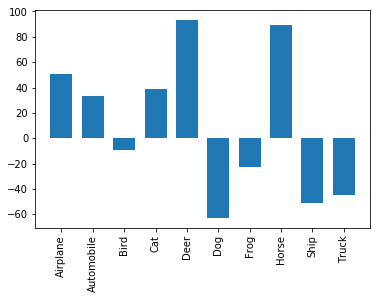

In [7]:
x_pos = np.arange(len(class_ranksW1A2))
fig, ax = plt.subplots()
ax.bar(x_pos, (class_ranksW1A2), 0.7)
ax.set_xticklabels(hw_classifier.classes, rotation='vertical')
ax.set_xticks(x_pos)
ax.set
plt.show()

#### W2A2:

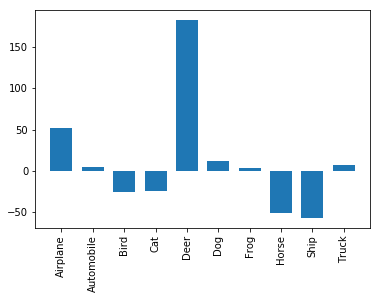

In [8]:
x_pos = np.arange(len(class_ranksW2A2))
fig, ax = plt.subplots()
ax.bar(x_pos, (class_ranksW2A2), 0.7)
ax.set_xticklabels(hw_classifier.classes, rotation='vertical')
ax.set_xticks(x_pos)
ax.set
plt.show()

## 4. Reset the device


In [13]:
from pynq import Xlnk

xlnk = Xlnk()
xlnk.xlnk_reset()